# Data and Libary imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Titles imports

In [2]:
amazon_titles = pd.read_csv("amazon_prime.csv")
appletv_titles = pd.read_csv("apple _TV.csv")
disney_titles = pd.read_csv("disney.csv")
hbo_titles = pd.read_csv("HBO_Max.csv")
netflix_titles = pd.read_csv("Netflix.csv")
paramount_titles = pd.read_csv("paramount.csv")

# Concatenation

In [3]:
titles = pd.concat([amazon_titles, appletv_titles, disney_titles, hbo_titles, netflix_titles, paramount_titles], axis = 0).reset_index()
titles.drop(['index'], axis=1, inplace=True)

In [4]:
# Seeing if we have duplicates
titles[titles.duplicated() == True].head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2024,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
2025,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2026,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
2027,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
2028,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


In [5]:
# Dropping duplicates
titles.drop_duplicates(inplace=True)
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382


# Cleaning the Data

In [6]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14261 entries, 0 to 16226
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14261 non-null  object 
 1   title                 14261 non-null  object 
 2   type                  14261 non-null  object 
 3   description           14209 non-null  object 
 4   release_year          14261 non-null  int64  
 5   age_certification     8311 non-null   object 
 6   runtime               14261 non-null  int64  
 7   genres                14261 non-null  object 
 8   production_countries  14261 non-null  object 
 9   seasons               4178 non-null   float64
 10  imdb_id               12978 non-null  object 
 11  imdb_score            12771 non-null  float64
 12  imdb_votes            12723 non-null  float64
 13  tmdb_popularity       14105 non-null  float64
 14  tmdb_score            13253 non-null  float64
dtypes: float64(5), int64(2),

In [7]:
titles.isna().sum()

id                          0
title                       0
type                        0
description                52
release_year                0
age_certification        5950
runtime                     0
genres                      0
production_countries        0
seasons                 10083
imdb_id                  1283
imdb_score               1490
imdb_votes               1538
tmdb_popularity           156
tmdb_score               1008
dtype: int64

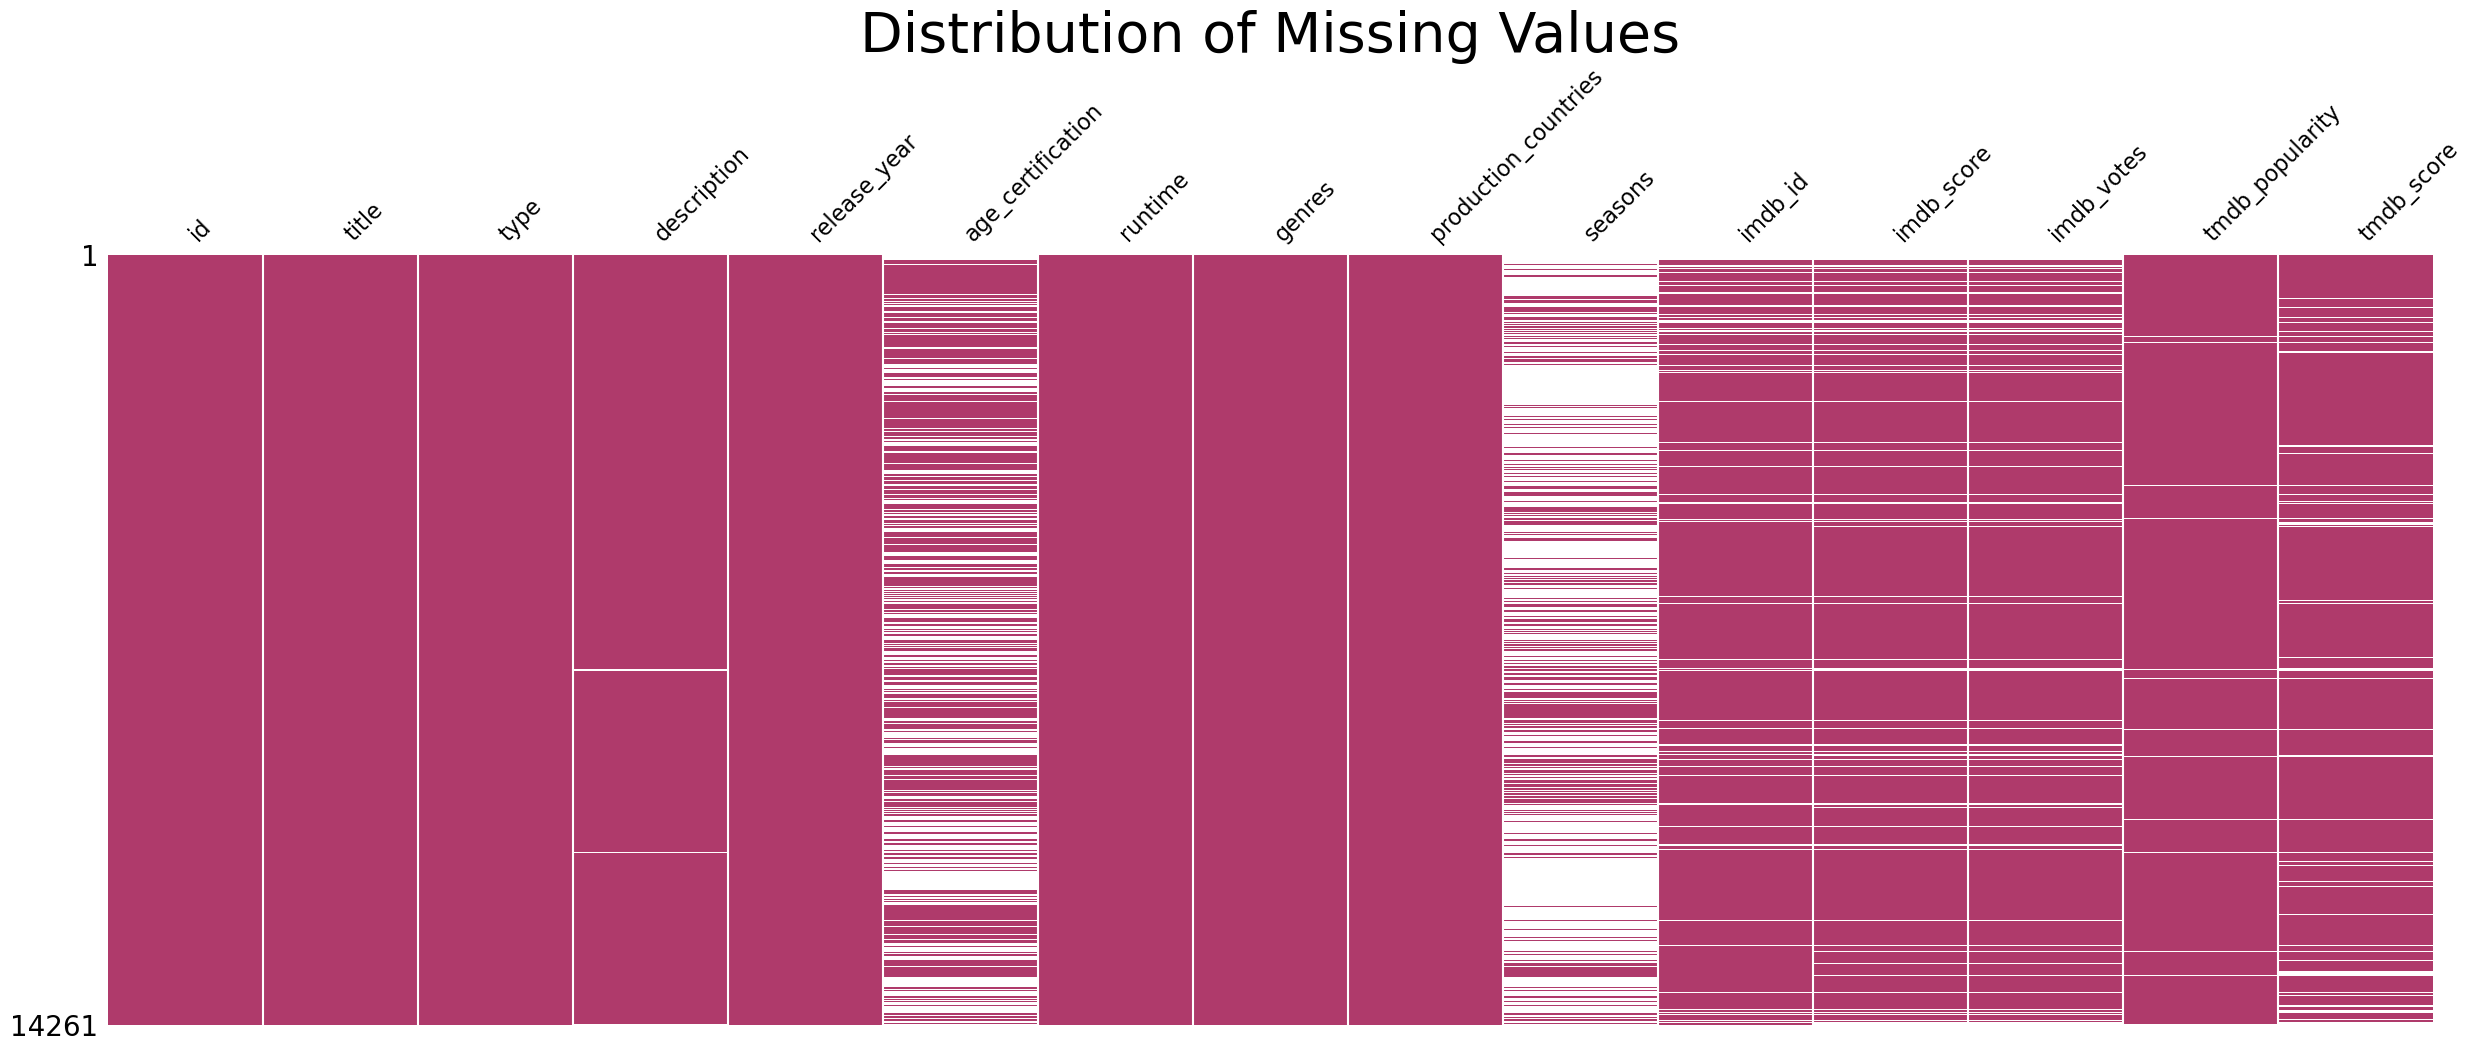

In [8]:
# Plot missing values matrix
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.69, 0.23, 0.42))
plt.title('Distribution of Missing Values', fontsize=40)
plt.show()


In [9]:
# For genres
titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
titles['genre'] = titles['genres'].str.split(',').str[0]

# For countries
titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
titles['production_country'] = titles['production_countries'].str.split(',').str[0]

In [10]:
titles.drop(['genres', 'production_countries'], axis=1, inplace=True)
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,NaN,tt0039628,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,NaN,tt0041094,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,NaN,tt0042332,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,NaN,tt0033563,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,NaN,tt0032455,7.7,98764.0,43.609,7.382,animation,US


In [11]:
titles['genre'].unique()

array(['family', 'horror', 'fantasy', 'animation', 'comedy', 'thriller',
       'romance', 'action', 'documentation', 'crime', 'western', '',
       'drama', 'scifi', 'history', 'music', 'reality', 'sport', 'war',
       'european'], dtype=object)

In [12]:
titles['production_country'].unique()

array(['US', 'GB', 'CA', '', 'FR', 'SE', 'AU', 'SK', 'ES', 'JP', 'PL',
       'IN', 'CN', 'BR', 'DE', 'NZ', 'AR', 'CI', 'NL', 'AE', 'KR', 'IT',
       'CO', 'ZA', 'CL', 'AT', 'PH', 'BW', 'GR', 'TW', 'MX', 'DK', 'TR',
       'PR', 'IL', 'IE', 'SU', 'CH', 'XC', 'BE', 'CU', 'DZ', 'MC', 'SN',
       'HK', 'NO', 'IR', 'CZ', 'HU', 'IS', 'BG', 'LU', 'GT', 'RO', 'RU',
       'EG', 'SG', 'FI', 'ID', 'MK', 'PT', 'BO', 'PE', 'UY', 'EC', 'NG',
       'DO', 'PA', 'LB', 'ET', 'PS', 'MY', 'MA', 'KE', 'SA', 'CD', 'UA',
       'QA', 'SY', 'GL', 'BY', 'JO', 'VN', 'TN', 'TH', 'GE', 'KH', 'KW',
       'PY', 'PK', 'IQ', 'BD', 'TZ', 'CM', 'KG', 'BT', 'AO', 'GH', 'ZW',
       'MW', 'MU', 'IO', 'AF', 'FO', 'YU', 'ZM', 'SB', 'BS', 'NI', 'BM'],
      dtype=object)

In [13]:
titles['genre'] = titles['genre'].replace('', np.nan)
titles['production_country'] = titles['production_country'].replace('',np.nan)

In [14]:
len(titles.loc[(titles['seasons'].isna()) & (titles['type'] == 'MOVIE')]) == titles.seasons.isna().sum()

True

In [15]:
titles['seasons'].fillna(0, inplace=True)
titles.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4504\2462699263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles['seasons'].fillna(0, inplace=True)


,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,0.0,tt0039628,7.9,50969.0,23.515,7.388,family,US
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,0.0,tt0041094,6.9,16502.0,16.194,6.500,horror,US
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,0.0,tt0042332,7.3,164292.0,93.547,7.035,fantasy,US
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,0.0,tt0033563,7.2,135045.0,54.265,6.999,animation,US
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,0.0,tt0032455,7.7,98764.0,43.609,7.382,animation,US


In [16]:
titles.isna().sum()

id                       0
title                    0
type                     0
description             52
release_year             0
age_certification     5950
runtime                  0
seasons                  0
imdb_id               1283
imdb_score            1490
imdb_votes            1538
tmdb_popularity        156
tmdb_score            1008
genre                  173
production_country     383
dtype: int64

In [17]:
titles.drop(['imdb_id','age_certification'], axis=1,inplace=True)
titles.dropna(inplace=True)
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11902 entries, 0 to 16224
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11902 non-null  object 
 1   title               11902 non-null  object 
 2   type                11902 non-null  object 
 3   description         11902 non-null  object 
 4   release_year        11902 non-null  int64  
 5   runtime             11902 non-null  int64  
 6   seasons             11902 non-null  float64
 7   imdb_score          11902 non-null  float64
 8   imdb_votes          11902 non-null  float64
 9   tmdb_popularity     11902 non-null  float64
 10  tmdb_score          11902 non-null  float64
 11  genre               11902 non-null  object 
 12  production_country  11902 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1.3+ MB


# Plot description based Recommender

In [18]:
titles['description'].head()

0    Kris Kringle, seemingly the embodiment of Sant...
1    The Wind in the Willows: Concise version of Ke...
2    Cinderella has faith her dreams of a better li...
3    Dumbo is a baby elephant born with over-sized ...
4    Walt Disney's timeless masterpiece is an extra...
Name: description, dtype: object

## Adding the Streaming Platform for the titles

In [19]:
lt = []
for i in titles['id']:
    movie_streaming = []
    if i in amazon_titles['id'].values:
        movie_streaming.append('amazon')
    if i in appletv_titles['id'].values:
        movie_streaming.append('appletv')
    if i in disney_titles['id'].values:
        movie_streaming.append('disney+')
    if i in hbo_titles['id'].values:
        movie_streaming.append('hbomax')
    if i in netflix_titles['id'].values:
        movie_streaming.append('netflix')
    if i in paramount_titles['id'].values:
        movie_streaming.append('paramount+')
    lt.append(movie_streaming)

In [20]:
titles['streaming_platform'] = lt
titles.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,0.0,7.9,50969.0,23.515,7.388,family,US,"[amazon, disney+]"
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,0.0,6.9,16502.0,16.194,6.500,horror,US,"[amazon, disney+]"
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,74,0.0,7.3,164292.0,93.547,7.035,fantasy,US,"[amazon, disney+]"
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,64,0.0,7.2,135045.0,54.265,6.999,animation,US,"[amazon, disney+]"
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,119,0.0,7.7,98764.0,43.609,7.382,animation,US,"[amazon, disney+]"


# Separating the data in Movies and TV Shows

In [21]:
movies = titles[titles['type'] == 'MOVIE'].copy().reset_index()
movies.drop(['index'], axis=1, inplace=True)

shows = titles[titles['type'] == 'SHOW'].copy().reset_index()
shows.drop(['index'], axis=1, inplace=True)
movies.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,96,0.0,7.9,50969.0,23.515,7.388,family,US,"[amazon, disney+]"
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,68,0.0,6.9,16502.0,16.194,6.500,horror,US,"[amazon, disney+]"
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,74,0.0,7.3,164292.0,93.547,7.035,fantasy,US,"[amazon, disney+]"
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,64,0.0,7.2,135045.0,54.265,6.999,animation,US,"[amazon, disney+]"
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,119,0.0,7.7,98764.0,43.609,7.382,animation,US,"[amazon, disney+]"


In [22]:
shows.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,ts30718,Schoolhouse Rock!,SHOW,Schoolhouse Rock! is an American interstitial ...,1973,3,7.0,8.2,4108.0,3.125,7.800,animation,US,"[amazon, disney+]"
1,ts22470,The Muppet Show,SHOW,Go behind the curtains as Kermit the Frog and ...,1976,25,5.0,8.4,25122.0,17.728,8.014,comedy,GB,"[amazon, disney+]"
2,ts20949,Zorro,SHOW,"Diego de la Vega, the son of a wealthy landown...",1957,30,3.0,8.2,3799.0,59.219,7.720,action,US,"[amazon, disney+]"
3,ts24939,Spider-Woman,SHOW,When Jessica Drew was bitten by a poisonous sp...,1979,21,1.0,5.8,873.0,17.427,7.900,animation,US,"[amazon, disney+]"
4,ts27944,Spin and Marty,SHOW,Spin and Marty is a popular series of televisi...,1955,12,1.0,8.1,323.0,2.725,6.000,western,US,"[amazon, disney+]"


In [23]:
#Define a TF-IDF Vectorizer Object. 
#This remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_movies = tfidf.fit_transform(movies['description'])
tfidf_matrix_shows = tfidf.fit_transform(shows['description'])

#Output the shape of tfidf_matrix
print(f'Shape for Movies: {tfidf_matrix_movies.shape}')
print(f'Shape for Shows: {tfidf_matrix_shows.shape}')

Shape for Movies: (8345, 26769)
Shape for Shows: (3557, 16047)


In [24]:
# Compute the cosine similarity matrix
cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)
cosine_sim_shows = linear_kernel(tfidf_matrix_shows, tfidf_matrix_shows)

In [25]:
indices_movies = pd.Series(movies.index, index=movies['title'])
indices_shows = pd.Series(shows.index, index=shows['title'])

In [26]:
def get_title(title,indices):
    """
    Function that gets the 'index searcher' and searches
    the user's title index.
    """
    
    try:
        index = indices[title]
    except:
        print("\n  Title not found")
        return None

    if isinstance(index, np.int64):
        return index
    
    else:
        rt = 0
        print("Select a title: ")
        for i in range(len(index)):
            print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
            print(f"({movies['release_year'].iloc[index[i]]})")
        rt = int(input())
        return index[rt]

In [27]:
def get_recommendations_movie(title, cosine_sim=cosine_sim_movies):
    """
    A function that takes a movie title as input and prints on the screen
    the 10 most similar movies based on the input description.
    """    
    
    title = get_title(title, indices_movies)
    if title == None:
        return 
    
    idx = indices_movies[title]
      
    print(f"Title: {movies['title'].iloc[idx]} |  Year: {movies['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print(movies[['title', 'release_year','streaming_platform']].iloc[movie_indices])

    print('**' * 40)

In [28]:
def get_recommendations_show(title, cosine_sim=cosine_sim_shows):
    """
    A function that takes a show title as input and prints on the screen
    the 10 most similar shows based on the input description.
    """
    
    title = get_title(title, indices_shows)
    if title == None:
        return 
    
    idx = indices_shows[title]

    print(f"Title: {shows['title'].iloc[idx]} | Year: {shows['release_year'].iloc[idx]}")

    print('**' * 40)

    # Get the pairwsie similarity scores of all shows with that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Get the show indices
    show_indices = [i[0] for i in sim_scores]

    print(shows[['title', 'release_year', 'streaming_platform']].iloc[show_indices])

    print('**' * 40)

In [29]:
get_recommendations_movie('Rocky')

Title: Rocky |  Year: 1976
********************************************************************************
                             title  release_year     streaming_platform
2324                         Creed          2015               [hbomax]
2974                      Rocky IV          1985  [netflix, paramount+]
2979                       Rocky V          1990  [netflix, paramount+]
2943                      Rocky II          1979  [netflix, paramount+]
7324                  Rocky Balboa          2006           [paramount+]
2976                     Rocky III          1982  [netflix, paramount+]
6503              Broadway Limited          1941           [paramount+]
765   Mickey: The Story of a Mouse          2022      [amazon, disney+]
6985           The Joe Louis Story          1953           [paramount+]
4457                         Fidaa          2017              [netflix]
********************************************************************************


C:\Users\User\AppData\Local\Temp\ipykernel_4504\1304303559.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices_movies[title]


In [30]:
get_recommendations_show('Narcos')

Title: Narcos | Year: 2015
********************************************************************************
                                                  title  release_year  \
2090                                         Seis Manos          2019   
957                                          It's a Sin          2021   
2931                         The Snitch Cartel: Origins          2021   
2092                    How to Sell Drugs Online (Fast)          2019   
477                                              Echo 3          2022   
1532                                        On My Block          2018   
1155                                        El Escamoso          2001   
2197                                  Playing with Fire          2019   
1541  Unsolved: The Murders of Tupac and The Notorio...          2018   
2477                           Wrong Side of the Tracks          2022   

     streaming_platform  
2090          [netflix]  
957            [hbomax]  
2931      

C:\Users\User\AppData\Local\Temp\ipykernel_4504\3879364461.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices_shows[title]


In [31]:
get_recommendations_movie('This is a Test')


  Title not found
